<a href="https://colab.research.google.com/github/GustavBoye/DRED_Autoencoder/blob/main/Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

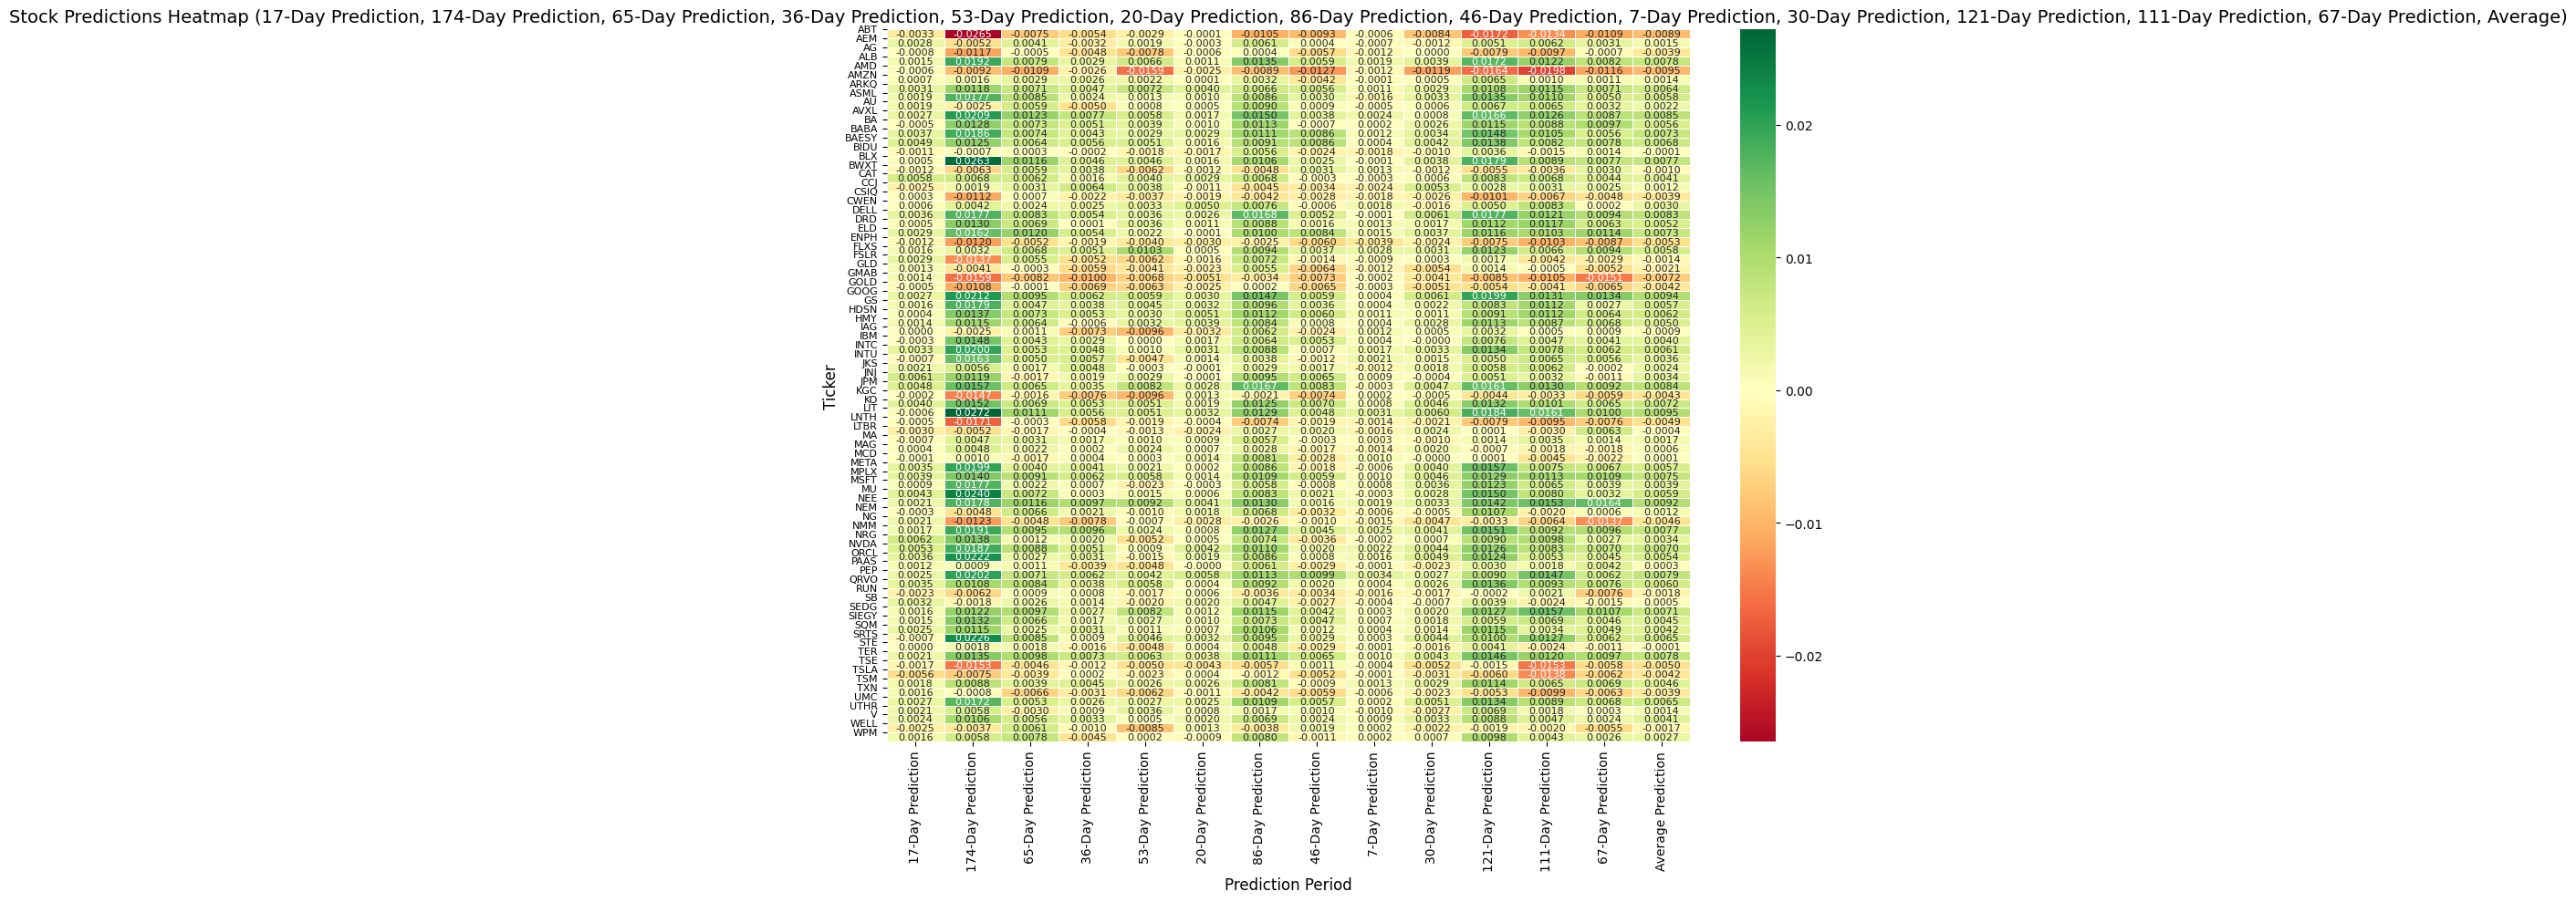

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from glob import glob

# Define folder path in Colab
folder_path = "/content/"  # Change this if needed

# Get all prediction CSV files
csv_files = glob(os.path.join(folder_path, "predictions_*.csv"))

# Function to load CSV dynamically
def load_data(file_path):
    """Load a CSV file and rename the second column based on filename."""
    match = re.search(r'predictions_(\d+).csv', file_path)
    if not match:
        return None  # Skip files that don't match the pattern

    days = match.group(1)  # Extract the number (e.g., "20" from "predictions_20.csv")
    df = pd.read_csv(file_path)
    df.columns = ["Ticker", f"{days}-Day Prediction"]  # Rename columns
    return df

# Load and merge all DataFrames while keeping the original order
merged_df = None
for file in csv_files:
    df = load_data(file)
    if df is not None:
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on="Ticker", how="outer")  # Keep original order

# Calculate the average across all prediction columns
prediction_cols = [col for col in merged_df.columns if col != "Ticker"]
merged_df['Average Prediction'] = merged_df[prediction_cols].mean(axis=1)

# Set Ticker as index (preserving order)
merged_df.set_index("Ticker", inplace=True)

# Plot Heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    merged_df, cmap="RdYlGn", center=0, annot=True, fmt=".4f",
    linewidths=0.5, annot_kws={"size": 8}
)

# Ensure all tick labels are displayed
heatmap.set_yticks(range(len(merged_df.index)))
heatmap.set_yticklabels(merged_df.index, fontsize=8, rotation=0)

# Adjust x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)

# Dynamic title
title = f"Stock Predictions Heatmap ({', '.join(prediction_cols)}, Average)"
plt.title(title, fontsize=14)
plt.xlabel("Prediction Period", fontsize=12)
plt.ylabel("Ticker", fontsize=12)
plt.tight_layout()  # Ensure labels fit properly
plt.show()


# New Section

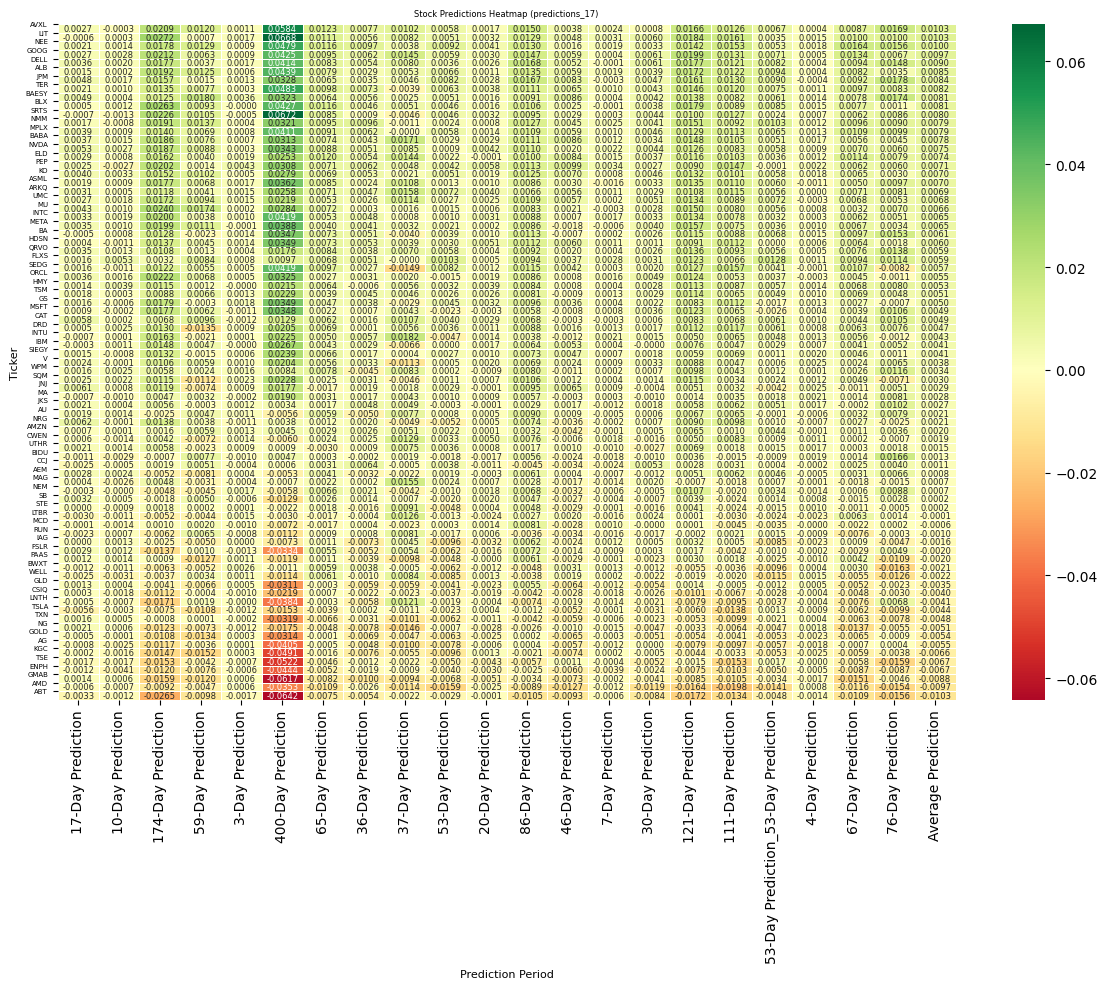

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from glob import glob

# Define folder path in Colab
folder_path = "/content/"  # Change this if needed

# Get all prediction CSV files, including those with "(number)" suffix
csv_files = glob(os.path.join(folder_path, "predictions_*.*csv"))

# Function to load CSV dynamically
def load_data(file_path):
    """Load a CSV file and rename the second column based on filename."""
    match = re.search(r'predictions_(\d+).*\.csv', file_path)  # Update regex to handle "(number)"
    if not match:
        return None  # Skip files that don't match the pattern

    days = match.group(1)  # Extract the number (e.g., "16" from "predictions_16 (2).csv")
    df = pd.read_csv(file_path)
    df.columns = ["Ticker", f"{days}-Day Prediction"]  # Rename columns
    return df

# Load and merge all DataFrames while keeping the original order
merged_df = None
for file in csv_files:
    df = load_data(file)
    if df is not None:
        if merged_df is None:
            merged_df = df
        else:
            # Use suffixes to avoid column name conflicts
            merged_df = pd.merge(merged_df, df, on="Ticker", how="outer", suffixes=("", f"_{df.columns[1]}"))

# Ensure data exists before proceeding
if merged_df is not None and not merged_df.empty:
    # Calculate the average across all prediction columns
    prediction_cols = [col for col in merged_df.columns if col != "Ticker"]

    # Select columns ending with '-Day Prediction' (all prediction columns)
    prediction_cols = [col for col in prediction_cols if col.endswith('-Day Prediction')]

    merged_df['Average Prediction'] = merged_df[prediction_cols].mean(axis=1)

    # Sort by 'Average Prediction' in descending order
    merged_df = merged_df.sort_values(by="Average Prediction", ascending=False)

    # Set Ticker as index (preserving order)
    merged_df.set_index("Ticker", inplace=True)

    # Plot Heatmap
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(
        merged_df, cmap="RdYlGn", center=0, annot=True, fmt=".4f",
        linewidths=0.5, annot_kws={"size": 6}
    )

    # Ensure all tick labels are displayed
    heatmap.set_yticks(range(len(merged_df.index)))
    heatmap.set_yticklabels(merged_df.index, fontsize=5, rotation=0)

    # Adjust x-axis labels
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)

    # Extract the base filename without path and extension
    base_filename = os.path.basename(csv_files[0]).split('.')[0]  # Assuming all files have the same prefix

    # Dynamic title with the CSV filename as the title
    title = f"Stock Predictions Heatmap ({base_filename})"
    plt.title(title, fontsize=6)  # Reduced font size from 14 to 10
    plt.xlabel("Prediction Period", fontsize=8)
    plt.ylabel("Ticker", fontsize=8)
    plt.tight_layout()  # Ensure labels fit properly
    plt.show()
else:
    print("No valid prediction files found.")


   Ticker  Normalized Rating
9    AVXL          10.000000
42    LIT           9.964286
52    NEE           9.698967
29   GOOG           9.398184
20   DELL           8.705640
..    ...                ...
70    TSE          -6.470765
23   ENPH          -6.471425
27   GMAB          -8.551933
4     AMD          -9.423524
0     ABT         -10.000000

[79 rows x 2 columns]


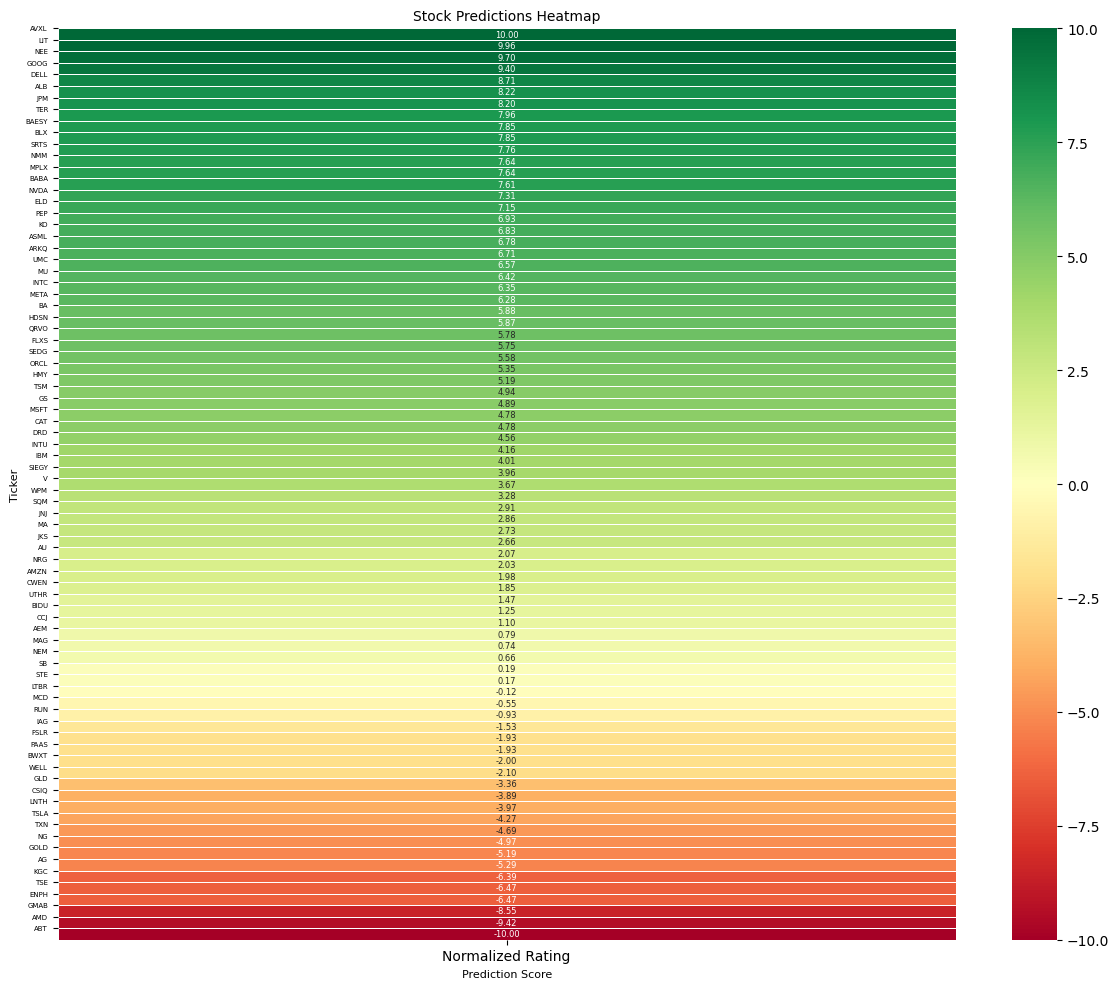

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from glob import glob

# Define folder path
folder_path = "/content/"  # Change this if needed

# Get all prediction CSV files
csv_files = glob(os.path.join(folder_path, "predictions_*.*csv"))

# Function to load CSV dynamically
def load_data(file_path):
    """Load a CSV file and rename the second column based on filename."""
    match = re.search(r'predictions_(\d+).*\.csv', file_path)
    if not match:
        return None

    days = match.group(1)
    df = pd.read_csv(file_path)
    df.columns = ["Ticker", f"{days}-Day Prediction"]
    return df

# Load and merge all DataFrames
merged_df = None
for file in csv_files:
    df = load_data(file)
    if df is not None:
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on="Ticker", how="outer", suffixes=("", f"_{df.columns[1]}"))

# Ensure data exists before proceeding
if merged_df is not None and not merged_df.empty:
    # Select prediction columns
    prediction_cols = [col for col in merged_df.columns if col.endswith('-Day Prediction')]

    # Compute the average prediction
    merged_df['Average Prediction'] = merged_df[prediction_cols].mean(axis=1)

    # Normalize to range -10 to 10
    min_val = merged_df['Average Prediction'].min()
    max_val = merged_df['Average Prediction'].max()
    merged_df['Normalized Rating'] = ((merged_df['Average Prediction'] - min_val) / (max_val - min_val)) * 20 - 10

    # Sort by 'Normalized Rating' in descending order
    merged_df = merged_df.sort_values(by="Normalized Rating", ascending=False)

    # Print the results
    print(merged_df[['Ticker', 'Normalized Rating']])

    # Set Ticker as index
    merged_df.set_index("Ticker", inplace=True)

    # Plot Heatmap
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(
        merged_df[['Normalized Rating']], cmap="RdYlGn", center=0, annot=True, fmt=".2f",
        linewidths=0.5, annot_kws={"size": 6}
    )

    heatmap.set_yticks(range(len(merged_df.index)))
    heatmap.set_yticklabels(merged_df.index, fontsize=5, rotation=0)

    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)

    plt.title("Stock Predictions Heatmap", fontsize=10)
    plt.xlabel("Prediction Score", fontsize=8)
    plt.ylabel("Ticker", fontsize=8)
    plt.tight_layout()
    plt.show()
else:
    print("No valid prediction files found.")


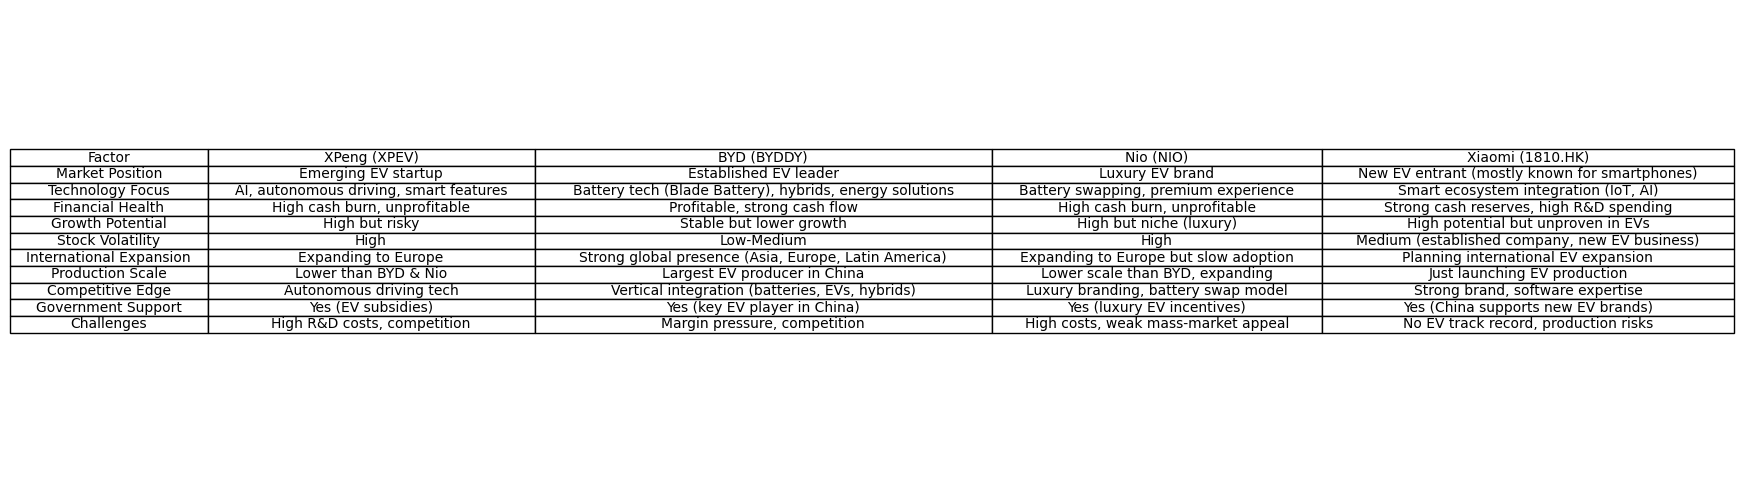

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the comparison table
data = {
    "Factor": [
        "Market Position", "Technology Focus", "Financial Health", "Growth Potential",
        "Stock Volatility", "International Expansion", "Production Scale",
        "Competitive Edge", "Government Support", "Challenges"
    ],
    "XPeng (XPEV)": [
        "Emerging EV startup", "AI, autonomous driving, smart features", "High cash burn, unprofitable",
        "High but risky", "High", "Expanding to Europe", "Lower than BYD & Nio",
        "Autonomous driving tech", "Yes (EV subsidies)", "High R&D costs, competition"
    ],
    "BYD (BYDDY)": [
        "Established EV leader", "Battery tech (Blade Battery), hybrids, energy solutions", "Profitable, strong cash flow",
        "Stable but lower growth", "Low-Medium", "Strong global presence (Asia, Europe, Latin America)",
        "Largest EV producer in China", "Vertical integration (batteries, EVs, hybrids)", "Yes (key EV player in China)",
        "Margin pressure, competition"
    ],
    "Nio (NIO)": [
        "Luxury EV brand", "Battery swapping, premium experience", "High cash burn, unprofitable",
        "High but niche (luxury)", "High", "Expanding to Europe but slow adoption", "Lower scale than BYD, expanding",
        "Luxury branding, battery swap model", "Yes (luxury EV incentives)", "High costs, weak mass-market appeal"
    ],
    "Xiaomi (1810.HK)": [
        "New EV entrant (mostly known for smartphones)", "Smart ecosystem integration (IoT, AI)", "Strong cash reserves, high R&D spending",
        "High potential but unproven in EVs", "Medium (established company, new EV business)", "Planning international EV expansion",
        "Just launching EV production", "Strong brand, software expertise", "Yes (China supports new EV brands)",
        "No EV track record, production risks"
    ]
}

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data)

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_frame_on(False)  # Remove the plot frame
ax.xaxis.set_visible(False)  # Hide X-axis
ax.yaxis.set_visible(False)  # Hide Y-axis

# Create a table
table_obj = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table style
table_obj.auto_set_font_size(False)
table_obj.set_fontsize(10)
table_obj.auto_set_column_width([0, 1, 2, 3, 4])  # Adjust column width for readability

# Save table as an image
plt.savefig("EV_Investment_Comparison.png", dpi=300, bbox_inches='tight')

# Show the table
plt.show()
